# Recurrent Neural Networks

In [66]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [67]:
df = pd.read_csv('C:/Users/BALLOUCH/Desktop/Time series project/Data/R_Data/DATA_LSTM/data.csv')
df.head()

,Tutar
0,83170.88
1,9714.14
2,1800.00
3,75185.08
4,79047.72


In [68]:
from pandas.tseries.offsets import MonthEnd

In [5]:
#df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
#df = df.set_index('Adjustments')
#df.head()

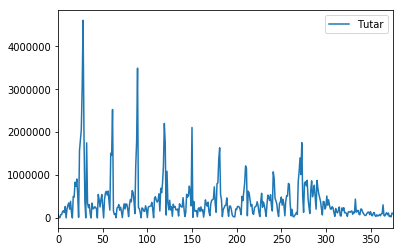

In [4]:
df.plot()

In [69]:
df.values.shape

(376, 1)

In [70]:
train = df.iloc[:356, :]
test = df.loc[356:, ]

In [71]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [72]:
train_sc[:4]

array([[0.01804302],
       [0.00210738],
       [0.00039049],
       [0.01631059]])

In [73]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully connected predictor

In [74]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [75]:
K.clear_session()

model = Sequential()
model.add(Dense(88, input_dim=1, activation='relu'))
model.add(Dense(90,  activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 88)                176       
_________________________________________________________________
dense_2 (Dense)              (None, 90)                8010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 91        
Total params: 8,277
Trainable params: 8,277
Non-trainable params: 0
_________________________________________________________________


In [76]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [86]:
model.fit(X_train, y_train, epochs=100,
          batch_size=50, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
355/355 [==============================] - 0s 56us/step - loss: 0.0079
Epoch 2/100
355/355 [==============================] - 0s 56us/step - loss: 0.0081
Epoch 00002: early stopping


In [87]:
y_pred = model.predict(X_test)

In [88]:
y_test1 = sc.inverse_transform(y_test)
y_pred1 = sc.inverse_transform(y_pred)

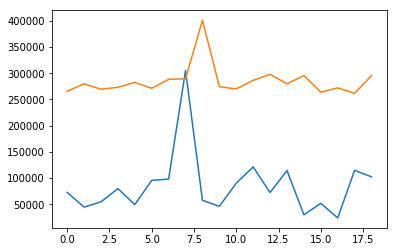

In [89]:
plt.plot(y_test1)
plt.plot(y_pred1)

In [90]:
from sklearn.metrics import mean_absolute_error
x=mean_absolute_error(y_test1, y_pred1)
x

201398.50226973684

### Recurrent predictor

In [26]:
from keras.layers import LSTM

In [27]:
X_train.shape

(355, 1)

In [28]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(355, 1, 1)

In [29]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [30]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.fit(X_train_t, y_train,
          epochs=50, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/50
355/355 [==============================] - 3s 8ms/step - loss: 0.0110
Epoch 2/50
355/355 [==============================] - 1s 4ms/step - loss: 0.0100
Epoch 3/50
355/355 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 4/50
355/355 [==============================] - 2s 5ms/step - loss: 0.0090
Epoch 5/50
355/355 [==============================] - 2s 4ms/step - loss: 0.0087
Epoch 6/50
355/355 [==============================] - 1s 4ms/step - loss: 0.0085
Epoch 7/50
355/355 [==============================] - 2s 5ms/step - loss: 0.0082
Epoch 8/50
355/355 [==============================] - 2s 4ms/step - loss: 0.0082
Epoch 00008: early stopping


In [32]:
y_pred = model.predict(X_test_t)


In [33]:
y_test2 = sc.inverse_transform(y_test)
y_pred2 = sc.inverse_transform(y_pred)

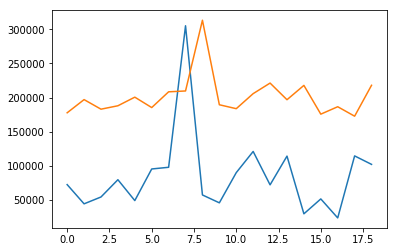

In [34]:
plt.plot(y_test2)
plt.plot(y_pred2)

In [35]:
from sklearn.metrics import mean_absolute_error
x=mean_absolute_error(y_test2, y_pred2)
x

126355.9159210526

## Windows

In [91]:
train_sc.shape

(356, 1)

In [92]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
0,0.018043
1,0.002107
2,0.000390
3,0.016311
4,0.017149


In [93]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [94]:
train_sc_df.head(10)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
0,0.018043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.017149,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.031413,0.017149,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.036721,0.031413,0.017149,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN,NaN
7,0.027142,0.036721,0.031413,0.017149,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN,NaN
8,0.057509,0.027142,0.036721,0.031413,0.017149,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN,NaN
9,0.000000,0.057509,0.027142,0.036721,0.031413,0.017149,0.016311,0.000390,0.002107,0.018043,NaN,NaN,NaN


In [95]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [96]:
X_train.head(10)

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
12,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721,0.031413,0.017149,0.016311,0.000390,0.002107,0.018043
13,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721,0.031413,0.017149,0.016311,0.000390,0.002107
14,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721,0.031413,0.017149,0.016311,0.000390
15,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721,0.031413,0.017149,0.016311
16,0.027658,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721,0.031413,0.017149
17,0.000000,0.027658,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721,0.031413
18,0.108320,0.000000,0.027658,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142,0.036721
19,0.104658,0.108320,0.000000,0.027658,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509,0.027142
20,0.180318,0.104658,0.108320,0.000000,0.027658,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000,0.057509
21,0.159977,0.180318,0.104658,0.108320,0.000000,0.027658,0.084078,0.044149,0.075825,0.064542,0.043557,0.000000


In [97]:
X_train.shape

(344, 12)

In [98]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values


### Fully Connected on Windows

In [99]:
K.clear_session()

model = Sequential()
model.add(Dense(80, input_dim=12, activation='relu'))
model.add(Dense(99,  activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 99)                8019      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 100       
Total params: 9,159
Trainable params: 9,159
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(X_train, y_train, epochs=100,
          batch_size=100, verbose=1, callbacks=[early_stop])

Epoch 1/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 2/100
344/344 [==============================] - 0s 58us/step - loss: 0.0122
Epoch 3/100
344/344 [==============================] - 0s 58us/step - loss: 0.0116
Epoch 4/100
344/344 [==============================] - 0s 58us/step - loss: 0.0094
Epoch 5/100
344/344 [==============================] - 0s 70us/step - loss: 0.0091
Epoch 6/100
344/344 [==============================] - 0s 58us/step - loss: 0.0088
Epoch 7/100
344/344 [==============================] - 0s 46us/step - loss: 0.0081
Epoch 8/100
344/344 [==============================] - 0s 47us/step - loss: 0.0078
Epoch 9/100
344/344 [==============================] - 0s 70us/step - loss: 0.0075
Epoch 10/100
344/344 [==============================] - 0s 70us/step - loss: 0.0073
Epoch 11/100
344/344 [==============================] - 0s 35us/step - loss: 0.0071
Epoch 12/100
344/344 [==============================] - 0s 35us/step - loss: 0.0069
Ep

In [101]:
y_pred = model.predict(X_test)


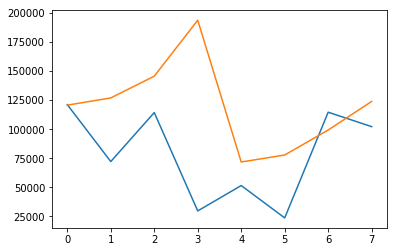

In [102]:
y_test2 = sc.inverse_transform(y_test)
y_pred2 = sc.inverse_transform(y_pred)

plt.plot(y_test2)
plt.plot(y_pred2)

In [103]:
from sklearn.metrics import mean_absolute_error
x=mean_absolute_error(y_test2, y_pred2)
x

45179.6017578125

### LSTM on Windows

In [104]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [105]:
X_train_t.shape

(344, 1, 12)

In [106]:
K.clear_session()
model = Sequential()

model.add(LSTM(80, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80)                29760     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 29,841
Trainable params: 29,841
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=80, verbose=1, callbacks=[early_stop])

Epoch 1/100
344/344 [==============================] - 1s 3ms/step - loss: 0.0155
Epoch 2/100
344/344 [==============================] - 0s 81us/step - loss: 0.0121
Epoch 3/100
344/344 [==============================] - 0s 93us/step - loss: 0.0115
Epoch 4/100
344/344 [==============================] - 0s 93us/step - loss: 0.0112
Epoch 5/100
344/344 [==============================] - 0s 174us/step - loss: 0.0109
Epoch 6/100
344/344 [==============================] - 0s 116us/step - loss: 0.0104
Epoch 7/100
344/344 [==============================] - 0s 139us/step - loss: 0.0100
Epoch 8/100
344/344 [==============================] - 0s 105us/step - loss: 0.0099
Epoch 9/100
344/344 [==============================] - 0s 105us/step - loss: 0.0098
Epoch 10/100
344/344 [==============================] - 0s 128us/step - loss: 0.0096
Epoch 11/100
344/344 [==============================] - 0s 105us/step - loss: 0.0094
Epoch 12/100
344/344 [==============================] - 0s 116us/step - loss: 0

In [109]:
y_pred = model.predict(X_test_t)
#plt.plot(y_test)
#plt.plot(y_pred)

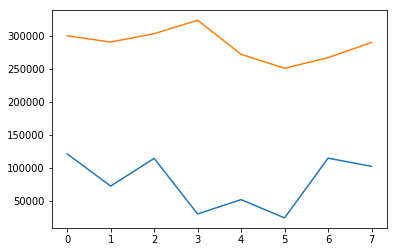

In [110]:
y_test2 = sc.inverse_transform(y_test)
y_pred2 = sc.inverse_transform(y_pred)

plt.plot(y_test2)
plt.plot(y_pred2)

In [111]:
from sklearn.metrics import mean_absolute_error
x=mean_absolute_error(y_test2, y_pred2)
x

208946.257265625

# CNN MODEL

In [48]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [44]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

In [45]:
X_train_t.shape

(228, 12, 1)

In [61]:
model = Sequential()
model.add(Conv1D(filters=96, kernel_size=3, activation='relu', input_shape=(12, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [62]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0144
Epoch 2/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 3/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4/100
228/228 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 5/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 6/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/100
228/228 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 8/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 9/100
228/228 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 00009: early stopping


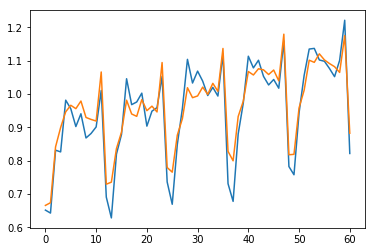

In [63]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)